In [66]:
import pandas as pd
import json as js
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [54]:
d = {'Quarter':['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], 'Sales':[5300, 5554, 6091, 6317, 6733], 'last_sales':[4300, 4554, 5000, 5591, 5733]}
df = pd.DataFrame(data=d)

In [3]:
df

,Quarter,Sales,last_sales
0,Q1,5300,4300
1,Q2,5554,4554
2,Q3,6091,5000
3,Q4,6317,5591
4,Q5,6733,5733


# 1. Bar Plot

- 1.1 Simple Bar Plot

Text(0.5,1,'Sales by Quarter')

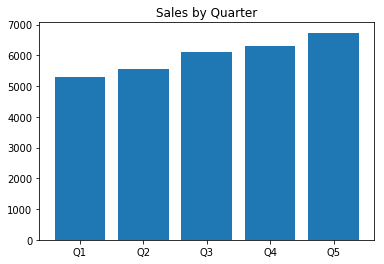

In [5]:
plt.bar(df['Quarter'], df['Sales'])
plt.title('Sales by Quarter')

- 1.2 Grouped Bar Plot

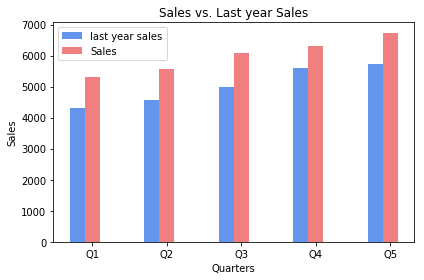

In [8]:
# data to plot
n_groups = 5
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.2
  
rects1 = plt.bar(index, df['last_sales'], bar_width,
color='cornflowerblue',
label='last year sales')

rects2 = plt.bar(index + bar_width, df['Sales'], bar_width,
color='lightcoral',
label='Sales')

plt.xlabel('Quarters')
plt.ylabel('Sales')
plt.title('Sales vs. Last year Sales')
plt.xticks(index + bar_width, ('Q1', 'Q2', 'Q3', 'Q4', 'Q5'))
plt.legend()
 
plt.tight_layout()
plt.show()

- 1.3 Stacked Bar Plots

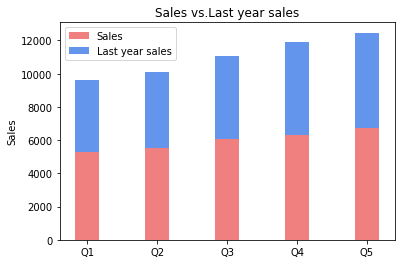

In [20]:
N = 5
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, df['Sales'], width, color='lightcoral')
p2 = plt.bar(ind, df['last_sales'], width,bottom=df['Sales'], color='cornflowerblue')

plt.ylabel('Sales')
plt.title('Sales vs.Last year sales')
plt.xticks(ind, ('Q1', 'Q2', 'Q3', 'Q4', 'Q5'))
plt.legend((p1[0], p2[0]), ('Sales', 'Last year sales'))

plt.show()

- 1.3.1 inverted axis stacked bar plot

Text(0.5,1,'Sales vs. Last year sales')

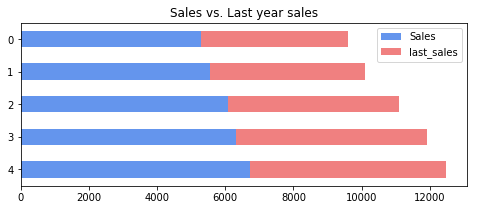

In [25]:
df.plot( kind='barh', stacked=True, figsize=(8,3), color={'cornflowerblue', 'lightcoral'}).invert_yaxis()
plt.title('Sales vs. Last year sales')

# 2. Line Plot

Text(0.5,1,'Sales vs. Last year Sales')

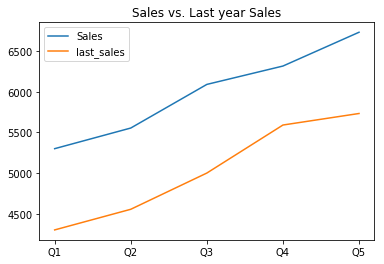

In [30]:
plt.plot(df['Quarter'], df['Sales'])
plt.plot(df['Quarter'], df['last_sales'])
plt.legend()
plt.title('Sales vs. Last year Sales')

# 3. Scatter plot

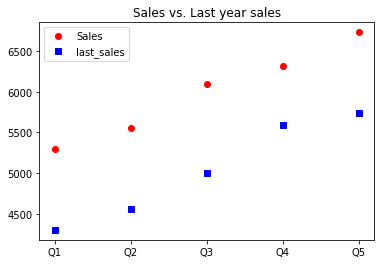

In [35]:
plt.plot(df['Quarter'], df['Sales'], 'ro')
plt.plot(df['Quarter'], df['last_sales'], 'bs')
plt.legend()
plt.title('Sales vs. Last year sales')
plt.show()

- 3.1 Scatter plot with trend lines

In [43]:
smoker = sns.load_dataset("tips")

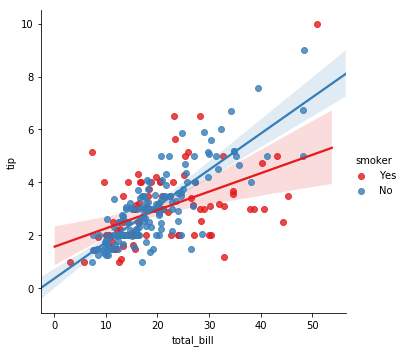

In [44]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=smoker, palette="Set1")

# Pie chart

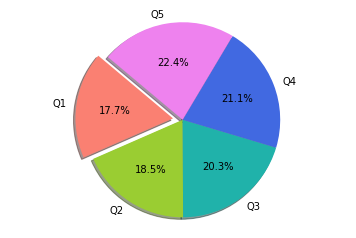

In [63]:
labels = 'Q1', 'Q2', 'Q3', 'Q4', 'Q5'
colors = ['salmon', 'yellowgreen', 'lightseagreen', 'royalblue', 'violet']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(df['Sales'], explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# Histogram

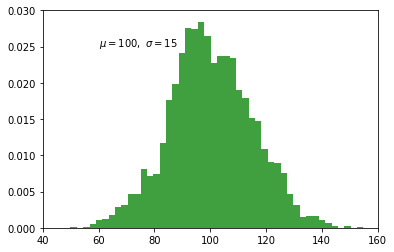

In [65]:
# Fixing random state for reproducibility
np.random.seed(3000)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(3000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(False)
plt.show()

# Violin plot

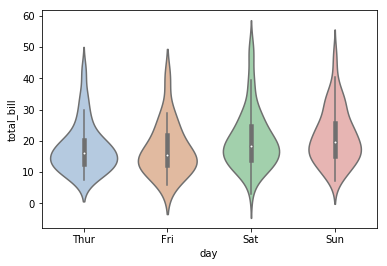

In [68]:
cmap=sns.set_palette(sns.color_palette("pastel", 24, 0.7))
ax = sns.violinplot(x="day", y="total_bill", data=smoker)

# Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x1451ae9cfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1451ae9cb70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1451af19080>],
 'medians': [<matplotlib.lines.Line2D at 0x1451abe5ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1451abe5860>],
 'means': []}

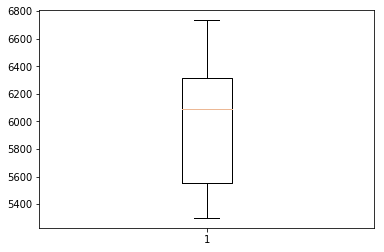

In [69]:
plt.boxplot(df['Sales'])

# Useful tips:

- check color palette

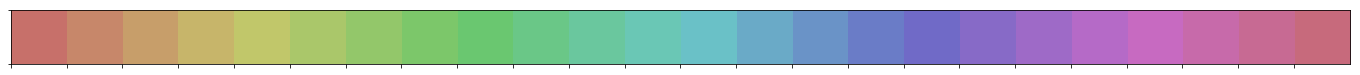

In [45]:
cmap=sns.set_palette(sns.color_palette("hls", 24, 0.7))
sns.palplot(sns.color_palette())

- annotation

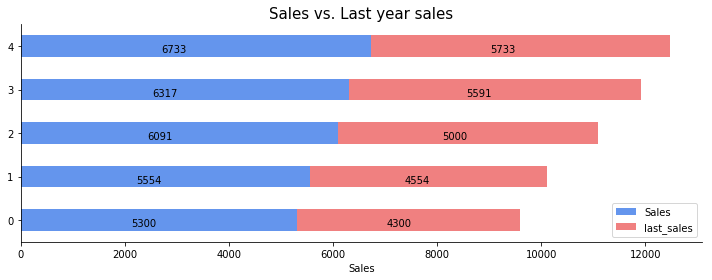

In [57]:
ax = df.plot.barh(stacked=True, figsize=(10, 4),  color={'cornflowerblue', 'lightcoral'})
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if width > 0:
        ax.annotate(f'{width:.0f}', (p.get_x()+0.4*width,
                                     p.get_y()+0.2*height), color='black', fontsize=10)
sns.despine()
plt.title('Sales vs. Last year sales', size=15)
plt.xlabel('Sales')
plt.tight_layout()